# 4. Экспоненциальное сглаживание

In [2]:
import numpy as np
import matplotlib.pyplot as plt

[15.      18.5     23.05    27.915   25.8745  26.66235]


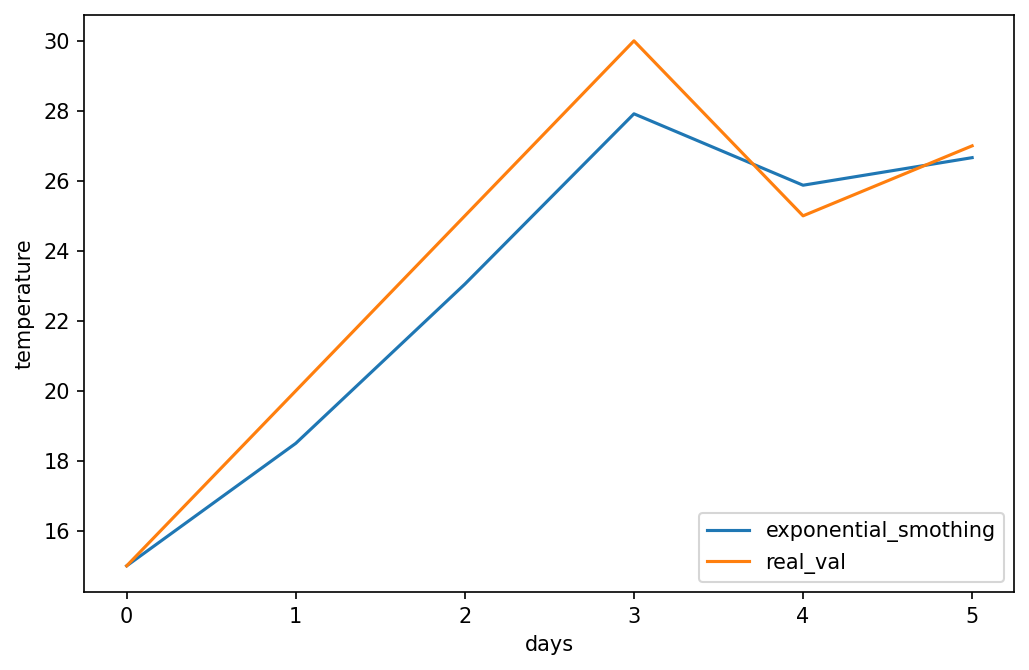

In [30]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)
plt.figure(figsize=(8, 5), dpi=150)
plt.plot(s, label='exponential_smothing')
plt.plot(data, label='real_val')
plt.xlabel('days')
plt.ylabel('temperature')
plt.legend(loc=4)

[15.      15.5     16.45    17.805   18.5245  19.37205]


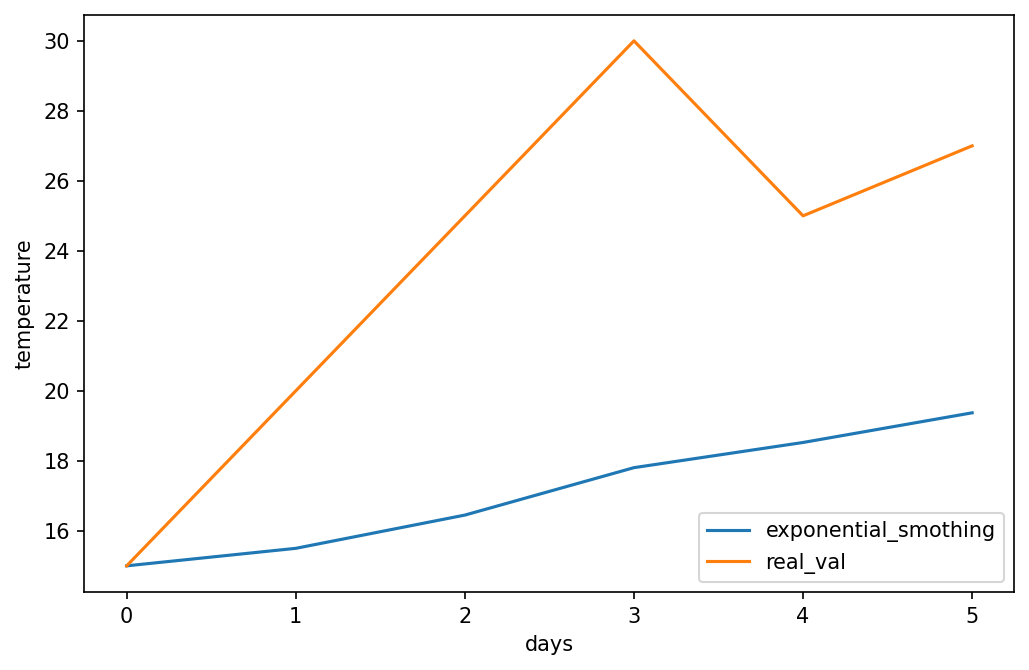

In [31]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.1
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)
plt.figure(figsize=(8, 5), dpi=150)
plt.plot(s, label='exponential_smothing')
plt.plot(data, label='real_val')
plt.xlabel('days')
plt.ylabel('temperature')
plt.legend(loc=4)

In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast()

print(forecast)

[26.5395]


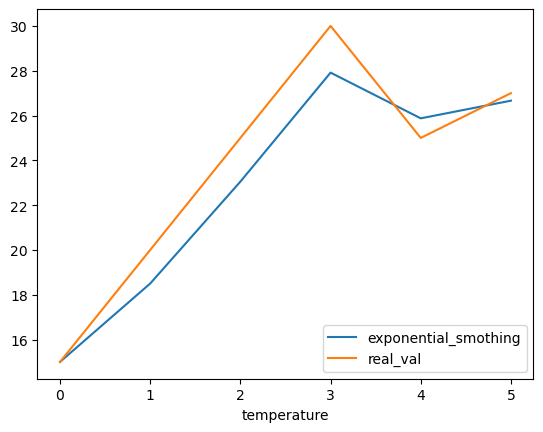

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
result = [data[0]]
for i in range(1,6):
    alpha = 0.7
    ses = SimpleExpSmoothing(data[:i+1:])
    model = ses.fit(smoothing_level = alpha, optimized = False)
    result.append(*model.forecast(1))
result 
plt.plot(result, label='exponential_smothing')
plt.plot(data, label='real_val')
plt.xlabel('days')
plt.xlabel('temperature')
plt.legend(loc=4);

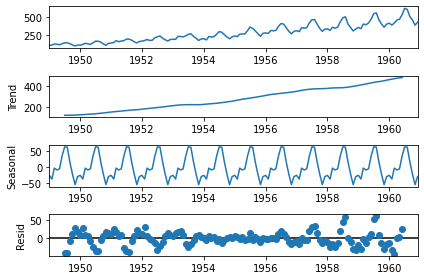

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("AirPassengers.zip", index_col='Month', parse_dates=['Month'])
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

[15.      18.5     23.05    27.915   25.8745  26.66235  0.     ]


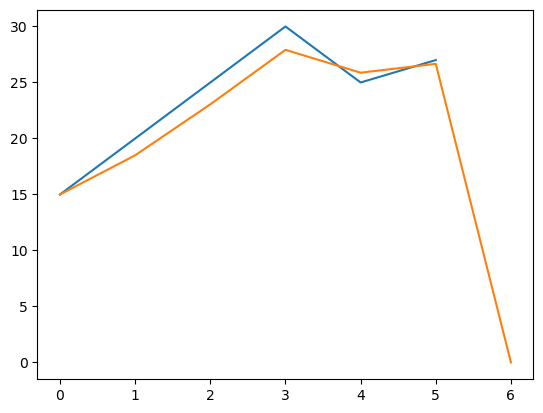

In [5]:
import numpy as np

def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

plt.plot(data)
plt.plot(s)

In [6]:
s[-2]

26.66235

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


## ДОПОЛНИТЕЛЬНО

* [Статья про типы экспоненциального сглаживания](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/) ([и её перевод на русский язык](https://machinelearningmastery.ru/exponential-smoothing-for-time-series-forecasting-in-python/)).

* [Лекция 9. Экспоненциальное сглаживание.](https://youtu.be/M0Hz1u59Ysw) Распознавание образов: метод -го ближайшего соседа (первая половина лекции).

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"daily-total-female-births.zip", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [9]:
df_diff_1 = df.diff().dropna()

In [10]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['10%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.62517863387136
p-value:  1.5472400091968453e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


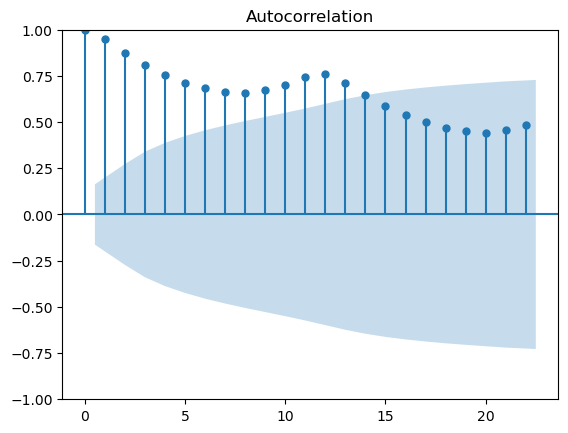

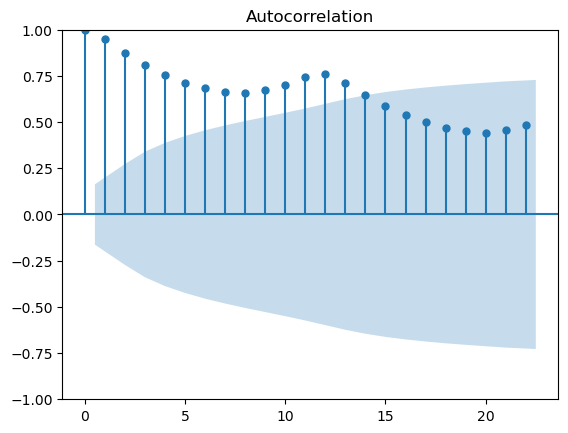

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("AirPassengers.zip", index_col='Month', parse_dates=['Month'])
plot_acf(df)

## КАК ЧИТАТЬ КОРРЕЛОГРАММУ?

<img src=m12_img1.png width=400>

Если максимальное значение коррелограммы (не считая значения в нуле) оказывается выраженным для лага, равного $k$ (на рисунке выше $k=3$), то временной ряд содержит циклическую компоненту с периодом $k$. То есть данные являются зависимыми/схожими с данными, находящимися на расстоянии $k$ дней/недель и т. д.

<img src=m12_img2.png width=400>

Если максимальное значение на коррелограмме находится в $k$, то ряд содержит только тенденцию (тренд).

<img src=m12_img2.png width=400>

А если все значения на графике автокорреляции колеблются в районе $0$, то ряд не содержит циклической компоненты и тренда либо содержит нелинейный тренд, который не видно на коррелограмме (так как нелинейный тренд не может быть выражен линейным коэффициентом корреляции).

***
## ЧАСТИЧНАЯ АВТОКОРРЕЛЯЦИЯ

Для определения сезонного периода используется частичная автокорреляция. Она похожа на классическую автокорреляцию, однако дополнительно избавляется от линейной зависимости между сдвинутыми рядами. График частичной автокорреляции читается так же, как и коррелограмма.

Частичная автокорреляция строится с помощью метода [plot_pacf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html) из пакета statsmodels.graphics.tsaplots.

Если вы хотите узнать больше про частичную автокорреляцию, рекомендуем обратиться к [этой статье](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/?__cf_chl_tk=Hf5sX1kEDNj.gepnQq2pPs4icSy2FPJUpr0RRZVtKOs-1662130047-0-gaNycGzNCZE) (перевод её основной части на [русский язык](https://www.helenkapatsa.ru/chastichnaia-avtokorrieliatsiia/)).

## АВТОКОРРЕЛЯЦИЯ ОСТАТКОВ

Помимо анализа временного ряда на наличие или отсутствие взаимозависимости, иногда смотрят автокорреляцию остатков модели. В хорошей модели остатки (ошибки) должны иметь случайный характер — это означает, что модель уловила все существующие зависимости.

Рассмотрим, как определять автокорреляцию остатков по графикам остатков (ошибок предсказания):

<img src=m12_img4.png width=400>

На графике выше в большинстве случаев после положительных остатков следуют положительные, а после отрицательных — отрицательные. Это пример положительной автокорреляции.

<img src=m12_img5.png width=400>

А в этом случае после положительных остатков чаще всего следуют отрицательные и наоборот, на графике — отрицательная автокорреляция.

Если вы хотите глубже изучить теорию по автокорреляции, предлагаем вам разобрать [эту статью](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm).

## Авторегрессионная модель

Авторегрессионная модель — это модель временных рядов, которая описывает, как прошлые значения временного ряда влияют на его текущее значение. Как можно понять из значений частей слова, авторегрессия представляет собой линейную регрессию на себя.

## AR-МОДЕЛИРОВАНИЕ НА PYTHON

Для загрузки класса [ar_model.AutoReg](https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AutoReg.html), который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv('opsd_germany_daily.csv', sep=",")

При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [13]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [14]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sun, 30 Apr 2023   AIC                          48483.625
Time:                        12:27:17   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод `predict` требует два обязательных параметра — **метки начала и окончания предсказания**. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна `len(train_data)+100`, что эквивалентно `len(df)-1`, так как `len(df) = len(train_data) + len(test_data)`.

In [15]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
pred

4283    1199.580761
4284    1132.051688
4285    1392.772651
4286    1425.877770
4287    1424.606502
           ...     
4378    1355.220188
4379    1359.014426
4380    1334.516355
4381    1299.851112
4382    1309.602440
Length: 100, dtype: float64

## Существуют и альтернативные AR-методы прогнозирования временных рядов:

* МА (скользящее среднее),

* ARMA (авторегрессионное скользящее среднее),

* ARIMA (авторегрессионное интегрированное скользящее среднее),

* SARIMA (сезонное авторегрессионное интегрированное скользящее среднее),

* VAR (векторная авторегрессия),

* VARMA (скользящее среднее векторной авторегрессии),

* SES (простое экспоненциальное сглаживание, которое мы рассмотрели в юните 4).

In [16]:
df = pd.read_csv('opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [17]:
# Отложите в test последнее значение временного ряда.
train_data = df['Consumption'][:len(df)-1]
test_data = df['Consumption'][len(df)-1:]

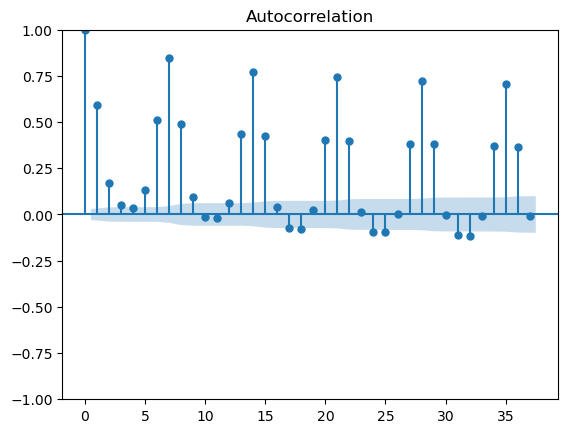

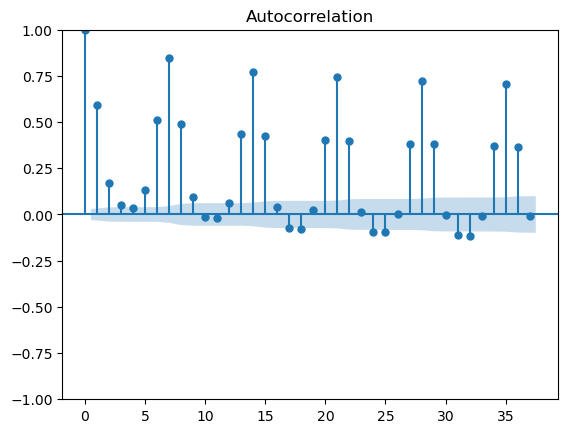

In [18]:
# Проанализируйте временной ряд на наличие тренда и сезонности.
plot_acf(df['Consumption'])

In [19]:
# Постройте прогноз на одно последнее значение с помощью экспоненциального сглаживания (a=0.7). 
# Сравните результат с фактическим значением, которое вы отложили вначале.

from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(df['Consumption'])

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)


4383    1146.300482
dtype: float64


In [20]:

ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4382
Model:                     AutoReg(8)   Log Likelihood              -24795.016
Method:               Conditional MLE   S.D. of innovations             70.091
Date:                Sun, 30 Apr 2023   AIC                          49610.032
Time:                        12:27:33   BIC                          49673.866
Sample:                             8   HQIC                         49632.557
                                 4382                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            120.9934     14.221      8.508      0.000      93.121     148.865
Consumption.L1     0.6456      0.013     48.954      0.000       0.620       0.671
Consumption.L2    -0.0965      0.011

## Файл Exp_AR

## ПОЛЕЗНЫЕ ССЫЛКИ МОДУЛЯ:

* [Installing statsmodels](https://www.statsmodels.org/devel/install.html)

* [“A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python”](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/) ([«Нежное введение в экспоненциальное сглаживание для прогнозирования временных рядов в Python»](https://machinelearningmastery.ru/exponential-smoothing-for-time-series-forecasting-in-python/))

* [Лекция 9.](https://youtu.be/M0Hz1u59Ysw) Экспоненциальное сглаживание. Распознавание образов: метод -го ближайшего соседа

* [“A Gentle Introduction to Autocorrelation and Partial Autocorrelation”](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) ([«Частичная автокорреляция (PACF)»](https://www.helenkapatsa.ru/chastichnaia-avtokorrieliatsiia/))

* [“How to Perform a Durbin-Watson Test in Python”](https://www.statology.org/durbin-watson-test-python/)

* [“Autocorrelation”](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm)